In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import random 

In [189]:
brands = {"LV":["alma", "neverfull", "newwavechaintote", "petiteboitechapeau", "speedy"],
         "Chanel":["2.55", "boy", "classicdoubleflapbag", "grandshoppingtote"],
         "Gucci":["dionysus", "ggmarmont", "sohodisco", "sylvie"],
         "MK":["jetsettote", "mercertotebag", "selmasatchel"],
         "LP":["classic"],
         "Coach":["F57842"],
         "other":["other"],
         "other_bag":["bag"]}

In [58]:
random.seed(23)
random.sample([1,2,3,4],2)

[3, 1]

In [24]:
def check_path(path):
    if not os.path.exists(path):
        os.system("mkdir " + path)

In [82]:
def copy_data(data_list, label, path, copy_type="brands"):
    path = os.path.join(path, label)
    check_path(path)
    if copy_type == "brands":
        for i in data_list:
            os.system("cp " + i + " " + path + "/" + i.split("/")[-2] + "_" + i.split("/")[-1].split(".")[0] + ".jpg")
    elif copy_type == "name":
        for i in data_list:
            os.system("cp " + i + " " + path)
        

In [186]:
def train_validation_split(inpath, outpath, split_type="brands", random_seed = 1):
    train_path = os.path.join(outpath, "train")
    val_path = os.path.join(outpath, "val")
    test_path = os.path.join(outpath, "test")
    check_path(train_path)
    check_path(val_path)
    check_path(test_path)
    random.seed(random_seed)
    train_num = 0 
    test_num = 0 
    val_num = 0 
    if split_type == "brands":
        for key in brands:
            for kk in brands[key]:
                images = [os.path.join(os.path.join(inpath, key + "/" + kk), i) for i in os.listdir(os.path.join(inpath, key + "/" + kk)) if i.split(".")[1] == "jpg"]
                train = random.sample(images, int(len(images) * 0.8))
                train_num += len(train)
                val_test = [i for i in images if i not in train]
                val = random.sample(val_test, int(len(val_test) * 0.5))
                val_num += len(val)
                test = [i for i in val_test if i not in val]
                test_num += len(test)
                copy_data(train, key, train_path)
                copy_data(val, key, val_path)
                copy_data(test, key, test_path)
            print(train_num)
        print(train_num, test_num, val_num)
    elif split_type == "name":
        for key in brands:
            for kk in brands[key]:
                images = [os.path.join(os.path.join(inpath, key + "/" + kk), i) for i in os.listdir(os.path.join(inpath, key + "/" + kk)) if i.split(".")[1] == "jpg"]
                train = random.sample(images, int(len(images) * 0.8))
                val_test = [i for i in images if i not in train]
                val = random.sample(val_test, int(len(val_test) * 0.5))
                test = [i for i in val_test if i not in val]
                copy_data(train, kk, train_path, copy_type="name")
                copy_data(val, kk, val_path, copy_type="name")
                copy_data(test, kk, test_path, copy_type="name")

In [191]:
inpath = "/Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed"
outpath = "/Users/jianinglu1/Documents/GitHub/DataInsight/data/processed/brands"
train_validation_split(inpath, outpath, split_type="brands", random_seed = 1)

724
1337
1857
2237
2450
2682
3082
3467
3467 444 431


In [192]:
inpath = "/Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed"
outpath = "/Users/jianinglu1/Documents/GitHub/DataInsight/data/processed/name"
train_validation_split(inpath, outpath, split_type="name", random_seed = 1)

In [182]:
def prepare_other_bag(path, out_path):
    images = [i for i in os.listdir(path)]
    images_use = random.sample(images, 500)
    for i in images_use:
        print("cp " + path + i.split()[0] + "\ " + i.split()[1] + " " + out_path)
        os.system("cp " + path +  i.split()[0] + "\ " + i.split()[1] + " " + out_path)
def prepare_others(path, out_path):
    images = [str(i) + ".jpg" for i in range(2300) if str(i) + ".jpg" not in os.listdir("/Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other")]
    images_use = random.sample(images, 500)
    for i in images_use:
        os.system("cp " + os.path.join(path,i) + " " + out_path)

In [181]:
path = "/Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/"
out_path = "/Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag"
prepare_other_bag(path, out_path)

cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ business_1.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ tossed_35.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/leather\ handbag_12.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/expensive\ handbag_25.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/crocodile\ handbag_14.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ tossed_28.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/

cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/green\ handbag_29.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ clutching_32.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ opening_5.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/alligator\ handbag_8.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/pair\ handbag_28.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/cloth\ handbag_29.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/b

cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/prada\ handbag_33.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ threw_29.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/skin\ handbag_10.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/had\ handbag_5.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ swinging_29.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/designer\ handbag_25.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp

cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ opening_24.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ mirror_3.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ grab_20.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/skin\ handbag_28.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/same\ handbag_23.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ was_5.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /User

cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/nice\ handbag_16.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/scarf\ handbag_29.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ got_34.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ shut_31.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/large\ handbag_20.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ carry_22.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /User

cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/white\ handbag_16.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/large\ handbag_5.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/capacious\ handbag_20.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ suit_19.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ pick_20.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ business_26.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag


cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/shabby\ handbag_12.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/leather\ handbag_1.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ grab_30.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/held\ handbag_4.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/old\ handbag_1.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ shoes_28.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /User

cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/green\ handbag_1.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/cloth\ handbag_18.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ clutched_27.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/cloth\ handbag_26.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/hermes\ handbag_12.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/beautiful\ handbag_15.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/b

cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/open\ handbag_27.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ opening_31.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ business_17.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/briefcase\ handbag_5.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/handbag\ gathering_23.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/bag
cp /Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/handbag/expensive\ handbag_5.jpg /Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/

In [183]:
path = "/Users/jianinglu1/Documents/GitHub/DataInsight/data/clean/other/"
out_path = "/Users/jianinglu1/Documents/GitHub/DataInsight/data/preprocessed/other/other"
prepare_others(path, out_path)

### Model training

In [2]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((256,256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [3]:
data_dir = "/Users/jianinglu1/Documents/GitHub/DataInsight/data/processed/brands/"

In [4]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=100,
                                             shuffle=True)
                for x in ['train', 'val']}

In [5]:
len(dataloaders["train"])
len(dataloaders["val"])

5

In [6]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

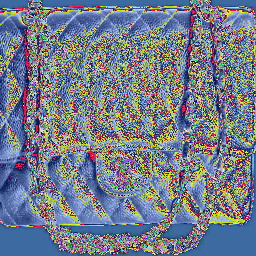

In [7]:
torchvision.transforms.ToPILImage()(image_datasets["train"][1][0])

In [8]:
next(iter(dataloaders["train"]))[0].shape

torch.Size([100, 3, 256, 256])

In [9]:
next(iter(dataloaders["train"]))[0].shape

torch.Size([100, 3, 256, 256])

In [10]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

In [11]:
inputs, classes = next(iter(dataloaders['train']))

In [12]:
out = torchvision.utils.make_grid(inputs)

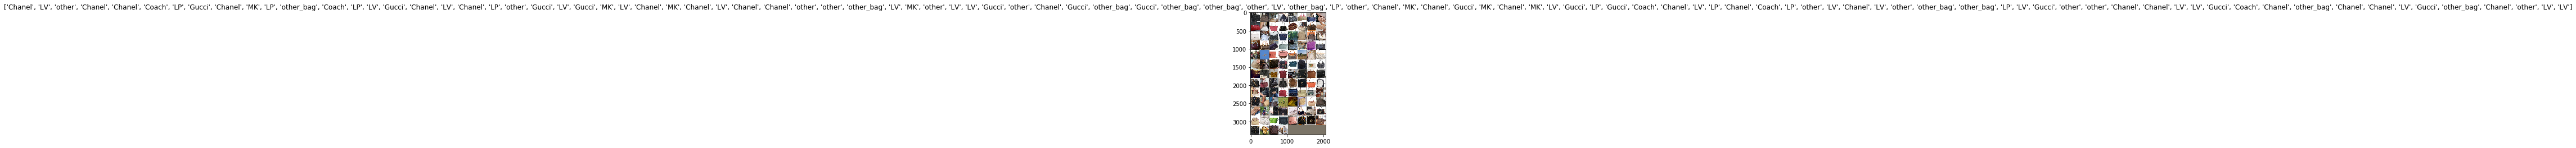

In [13]:
imshow(out, title=[class_names[x] for x in classes])

In [14]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                print(running_corrects)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [15]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 8)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [16]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
tensor(14)
tensor(36)


KeyboardInterrupt: 

In [227]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [247]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(8,10))

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}, target:{}'.format(class_names[preds[j]], class_names[labels[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

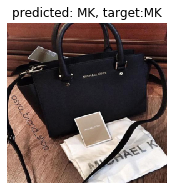

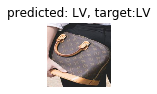

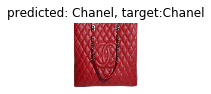

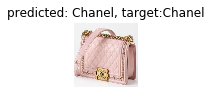

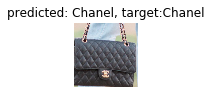

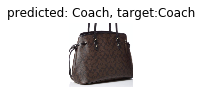

In [248]:
visualize_model(model_ft)